In [2]:
from google.colab import files
import io
import pandas as pd
myfile = files.upload()
data = pd.read_excel(io.BytesIO(myfile['mydata.xlsx']))

Saving mydata.xlsx to mydata.xlsx


In [3]:
data = data.iloc[:, 1:]

In [4]:
# feature_list = list(data.columns[1:])
x = data.iloc[:, 1:]
y = data.iloc[:, 0]

In [61]:
data.shape

(256, 12)

In [46]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from statsmodels.tsa.arima_process import arma_generate_sample

In [62]:
# Assuming your time series data is stored in 'x' and the corresponding targets in 'y'

# Apply log transformation to the data
x_log = np.log1p(x)
y_log = np.log1p(y)

# x = x.diff().dropna()  # 독립 변수 차분
# y = y.diff().dropna()  # target 변수 차분

# Split the log-transformed data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_log, y_log, test_size=0.05, shuffle=False)

# Scale the features and target using MinMaxScaler
scaler = MinMaxScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled  = scaler.transform(x_test)

y_train_scaled  = scaler.fit_transform(y_train.values.reshape(-1, 1)).flatten()
y_test_scaled  = scaler.transform(y_test.values.reshape(-1, 1)).flatten()

# Create and train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(x_train_scaled , y_train_scaled )

# Make predictions on the test set
y_pred_scaled  = rf_model.predict(x_test_scaled)

# Apply inverse scaling to the predictions and actual values
#y_pred_inv = scaler.inverse_transform(y_pred_scaled .reshape(-1, 1)).flatten()
#y_test_inv = scaler.inverse_transform(y_test_scaled .reshape(-1, 1)).flatten()


In [63]:
y_test_scaled

array([0.7856581 , 0.81283022, 0.83995596, 1.00069372, 0.97583086,
       0.81011041, 0.7982477 , 0.81277758, 1.00579204, 0.97987006,
       0.84682302, 0.80631114, 0.7143532 ])

In [64]:
mse = mean_squared_error(y_test_scaled, y_pred_scaled)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.004000815213301239


In [65]:
rmse = mse ** 0.5
print("RMSE:", rmse)

RMSE: 0.06325199770205871


In [66]:
# MAPE 계산
mape = mean_absolute_percentage_error(y_test_scaled, y_pred_scaled)
print("MAPE:", mape)

MAPE: 0.05761281446860282


In [67]:
# 평균 절대 오차(MAE) 계산
mae = mean_absolute_error(y_test_scaled, y_pred_scaled)
print("MAE:", mae)

MAE: 0.05158333386758381


In [68]:
from sklearn.metrics import r2_score

# 결정 계수를 계산합니다.
r2 = r2_score(y_test_scaled, y_pred_scaled)

# 결정 계수를 출력합니다.
print("R^2 Score:", r2)

R^2 Score: 0.5262458194796358


In [69]:
importances = rf_model.feature_importances_

In [70]:
importances

array([0.04186948, 0.01314652, 0.00375106, 0.00726197, 0.01954602,
       0.00822717, 0.39852753, 0.01867329, 0.48314398, 0.00279248,
       0.00306051])

In [71]:
indices = np.argsort(importances)[::-1]

In [72]:
indices

array([ 8,  6,  0,  4,  7,  1,  5,  3,  2, 10,  9])

In [73]:
feature_list = list(x.columns)

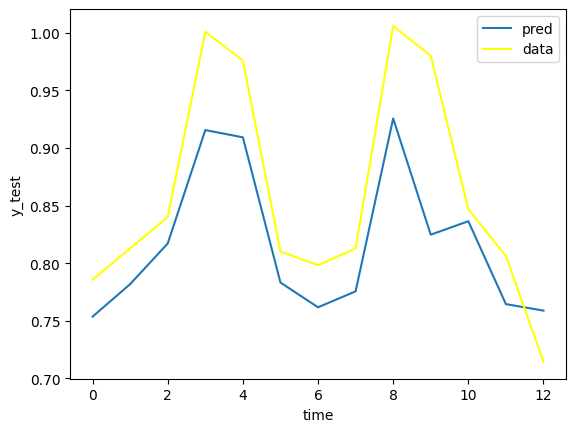

[0.75362255 0.78184569 0.8170742  0.91544731 0.9091525  0.78320345
 0.76173756 0.77557587 0.92555083 0.82472386 0.83638991 0.76449751
 0.75885698]
[0.7856581  0.81283022 0.83995596 1.00069372 0.97583086 0.81011041
 0.7982477  0.81277758 1.00579204 0.97987006 0.84682302 0.80631114
 0.7143532 ]


In [74]:
import matplotlib.pyplot as plt


plt.plot(y_pred_scaled, label='pred')
plt.plot(y_test_scaled, label='data',color = 'yellow')
plt.ylabel('y_test')
plt.xlabel('time')
plt.legend(loc='best')
plt.show()
print(y_pred_scaled)
print(y_test_scaled)

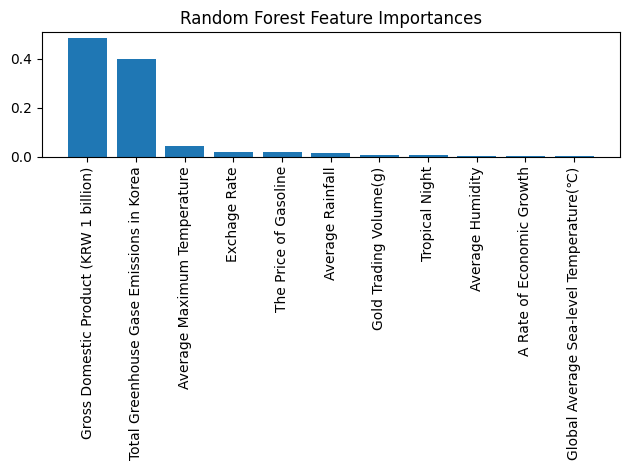

In [75]:

# 특성 중요도 시각화
plt.figure()
plt.title("Random Forest Feature Importances")
plt.bar(range(x_train.shape[1]), importances[indices], align="center")
plt.xticks(range(x_train.shape[1]), [feature_list[i] for i in indices], rotation=90)
plt.tight_layout()
plt.show()